In [1]:
# Import dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Load grad 1617 data
grad_1617_load = "../Resources/Graduation Data/Graduation '16-'17.csv"

In [3]:
# Store grad 16-17 Data into DataFrame
grad_1617_df = pd.read_csv(grad_1617_load)
grad_1617_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1.100170e+12,1,M,1,1,1617
1,1.100170e+12,6,F,13,13,1617
2,1.100170e+12,6,M,11,11,1617
3,1.100170e+12,7,F,1,1,1617
4,1.100170e+12,7,M,4,4,1617
...,...,...,...,...,...,...
21602,5.872770e+13,0,F,2,1,1617
21603,5.872770e+13,0,M,1,1,1617
21604,5.872770e+13,5,F,20,15,1617
21605,5.872770e+13,5,M,29,17,1617


In [4]:
total_Grads = grad_1617_df["GRADS"].sum()
total_Grads

429560

In [5]:
grad_1617_df.dtypes

CDS_CODE    float64
ETHNIC        int64
GENDER       object
GRADS         int64
UC_GRADS      int64
YEAR          int64
dtype: object

In [6]:
pd.options.display.float_format = '{:.0f}'.format

In [7]:
grad_1617_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170000000,1,M,1,1,1617
1,1100170000000,6,F,13,13,1617
2,1100170000000,6,M,11,11,1617
3,1100170000000,7,F,1,1,1617
4,1100170000000,7,M,4,4,1617
...,...,...,...,...,...,...
21602,58727700000000,0,F,2,1,1617
21603,58727700000000,0,M,1,1,1617
21604,58727700000000,5,F,20,15,1617
21605,58727700000000,5,M,29,17,1617


In [8]:
# Drop unnecessary columns
grad_1617_df = grad_1617_df.drop(["ETHNIC", "GENDER", "YEAR", "UC_GRADS"], axis=1)
grad_1617_df

,CDS_CODE,GRADS
0,1100170000000,1
1,1100170000000,13
2,1100170000000,11
3,1100170000000,1
4,1100170000000,4
...,...,...
21602,58727700000000,2
21603,58727700000000,1
21604,58727700000000,20
21605,58727700000000,29


In [9]:
total_Grads = grad_1617_df["GRADS"].sum()
total_Grads

429560

In [10]:
# Convert CDS_CODE to String
grad_1617_df['CDS_CODE'] = grad_1617_df['CDS_CODE'].astype(str)
grad_1617_df.dtypes

CDS_CODE    object
GRADS        int64
dtype: object

In [11]:
# Create columns for Dcode
grad_1617_df['Dcode'] = grad_1617_df['CDS_CODE'].str[-14:-9]
grad_1617_df

,CDS_CODE,GRADS,Dcode
0,1100170000000.0,1,10017
1,1100170000000.0,13,10017
2,1100170000000.0,11,10017
3,1100170000000.0,1,10017
4,1100170000000.0,4,10017
...,...,...,...
21602,58727700000000.0,2,72770
21603,58727700000000.0,1,72770
21604,58727700000000.0,20,72770
21605,58727700000000.0,29,72770


In [12]:
# Reorganize Dataframe
grad_1617_df = grad_1617_df[["Dcode", "GRADS"]]
grad_1617_df

,Dcode,GRADS
0,10017,1
1,10017,13
2,10017,11
3,10017,1
4,10017,4
...,...,...
21602,72770,2
21603,72770,1
21604,72770,20
21605,72770,29


In [13]:
# Group by school districts and calculate sum of enrollment
grad_1617 = grad_1617_df.groupby(["Dcode"]).sum()["GRADS"]
grad_1617

Dcode
10017    191
10025      1
10033      5
10041    175
10042      2
        ... 
76950     79
76970     68
76980     51
77030     70
77100      3
Name: GRADS, Length: 506, dtype: int64

In [14]:
# Store into DataFrame
grad_1617_df = pd.DataFrame(grad_1617).reset_index()
grad_1617_df

,Dcode,GRADS
0,10017,191
1,10025,1
2,10033,5
3,10041,175
4,10042,2
...,...,...
501,76950,79
502,76970,68
503,76980,51
504,77030,70


In [15]:
total = grad_1617_df["GRADS"].sum()
total

429560

In [16]:
# Load enroll 1617 data
enroll_1617_load = "../Resources/Enrollment Data/enrollment '16-'17.csv"

In [17]:
# Store enroll 16-17 Data into DataFrame
enroll_1617_df = pd.read_csv(enroll_1617_load)
enroll_1617_df

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,19645900000000,Los Angeles,Hawthorne,Ramona,2,F,2,2,3,1,...,0,0,0,0,0,0,0,0,12,0
1,19645900000000,Los Angeles,Hawthorne,Ramona,6,M,8,6,10,5,...,0,0,0,0,0,0,0,0,46,0
2,19645900000000,Los Angeles,Hawthorne,Ramona,0,F,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
3,19645900000000,Los Angeles,Hawthorne,Ramona,4,F,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,19645900000000,Los Angeles,Hawthorne,Ramona,9,M,2,0,0,3,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130189,58727500000000,Yuba,Wheatland,Wheatland Elementary,6,F,0,0,0,2,...,0,0,0,0,0,0,0,0,2,0
130190,58727500000000,Yuba,Wheatland,Wheatland Elementary,3,M,1,0,1,0,...,0,0,0,0,0,0,0,0,2,0
130191,58727500000000,Yuba,Wheatland,Wheatland Elementary,7,M,35,24,18,19,...,0,0,0,0,0,0,0,0,96,0
130192,58727500000000,Yuba,Wheatland,Wheatland Elementary,5,F,16,11,10,8,...,0,0,0,0,0,0,0,0,45,0


In [18]:
# Drop unnecessary columns
enroll_1617_df = enroll_1617_df.drop(["COUNTY", "DISTRICT", "SCHOOL", "ETHNIC", "GENDER", "KDGN", "GR_1", "GR_2", "GR_3", 
                                      "GR_4", "GR_5", "GR_6", "GR_7", "GR_8", "GR_9", "GR_10", "GR_11", "UNGR_SEC", "ENR_TOTAL",
                                      "ADULT", "UNGR_ELM"], axis = 1)
enroll_1617_df

,CDS_CODE,GR_12
0,19645900000000,0
1,19645900000000,0
2,19645900000000,0
3,19645900000000,0
4,19645900000000,0
...,...,...
130189,58727500000000,0
130190,58727500000000,0
130191,58727500000000,0
130192,58727500000000,0


In [19]:
# Drop values where enrollment = 0
enroll_1617_df = enroll_1617_df[enroll_1617_df.GR_12 != 0]
enroll_1617_df

,CDS_CODE,GR_12
92,19646300000000,6
93,19646300000000,9
95,19646300000000,60
96,19646300000000,74
265,19646300000000,1
...,...,...
130147,58727700000000,4
130148,58727700000000,1
130152,58727700000000,3
130153,58727700000000,3


In [20]:
total_Enroll = enroll_1617_df["GR_12"].sum()
total_Enroll

489221

In [21]:
# Convert CDS_CODE to String
enroll_1617_df['CDS_CODE'] = enroll_1617_df['CDS_CODE'].astype(str)
enroll_1617_df.dtypes

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CDS_CODE    object
GR_12        int64
dtype: object

In [22]:
# Create columns for Dcode
enroll_1617_df['Dcode'] = enroll_1617_df['CDS_CODE'].str[-14:-9]
enroll_1617_df

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CDS_CODE,GR_12,Dcode
92,19646300000000.0,6,64630
93,19646300000000.0,9,64630
95,19646300000000.0,60,64630
96,19646300000000.0,74,64630
265,19646300000000.0,1,64630
...,...,...,...
130147,58727700000000.0,4,72770
130148,58727700000000.0,1,72770
130152,58727700000000.0,3,72770
130153,58727700000000.0,3,72770


In [23]:
# Reorganize Dataframe
enroll_1617_df = enroll_1617_df[["Dcode", "GR_12"]]
enroll_1617_df

,Dcode,GR_12
92,64630,6
93,64630,9
95,64630,60
96,64630,74
265,64630,1
...,...,...
130147,72770,4
130148,72770,1
130152,72770,3
130153,72770,3


In [24]:
# Group by school districts and calculate sum of enrollment
enroll_1617 = enroll_1617_df.groupby(["Dcode"]).sum()["GR_12"]
enroll_1617

Dcode
10017    249
10033     27
10041    196
10058     48
10059      4
        ... 
76970     44
76980     73
77030    147
77100    119
77110     89
Name: GR_12, Length: 505, dtype: int64

In [25]:
# Store into DataFrame
enroll_1617_df = pd.DataFrame(enroll_1617).reset_index()
enroll_1617_df

,Dcode,GR_12
0,10017,249
1,10033,27
2,10041,196
3,10058,48
4,10059,4
...,...,...
500,76970,44
501,76980,73
502,77030,147
503,77100,119


In [26]:
# Merge Enrollment and Graduation data
grad_enroll_df = pd.merge(grad_1617_df, enroll_1617_df)
grad_enroll_df

,Dcode,GRADS,GR_12
0,10017,191,249
1,10033,5,27
2,10041,175,196
3,10058,74,48
4,10059,3,4
...,...,...,...
493,76950,79,122
494,76970,68,44
495,76980,51,73
496,77030,70,147


In [27]:
total_grad = grad_enroll_df["GRADS"].sum()
total_grad

429497

In [28]:
total_enroll = grad_enroll_df["GR_12"].sum()
total_enroll

489075

In [29]:
grad_enroll_df.dtypes

Dcode    object
GRADS     int64
GR_12     int64
dtype: object

In [30]:
rate_1617_df = grad_enroll_df

In [31]:
pd.options.display.float_format = "{:,.2f}".format

In [32]:
rate_1617_df['GRADS'] = rate_1617_df['GRADS'].astype(float).round(2)
rate_1617_df['GR_12'] = rate_1617_df['GR_12'].astype(float).round(2)
rate_1617_df

,Dcode,GRADS,GR_12
0,10017,191.00,249.00
1,10033,5.00,27.00
2,10041,175.00,196.00
3,10058,74.00,48.00
4,10059,3.00,4.00
...,...,...,...
493,76950,79.00,122.00
494,76970,68.00,44.00
495,76980,51.00,73.00
496,77030,70.00,147.00


In [33]:
# Create column for grad rate
rate_1617_df['Grad_Rate'] = 100 * rate_1617_df['GRADS']/rate_1617_df['GR_12']
rate_1617_df

,Dcode,GRADS,GR_12,Grad_Rate
0,10017,191.00,249.00,76.71
1,10033,5.00,27.00,18.52
2,10041,175.00,196.00,89.29
3,10058,74.00,48.00,154.17
4,10059,3.00,4.00,75.00
...,...,...,...,...
493,76950,79.00,122.00,64.75
494,76970,68.00,44.00,154.55
495,76980,51.00,73.00,69.86
496,77030,70.00,147.00,47.62


In [34]:
# Load Data to CSV
rate_1617_df.to_csv('rate_1617.csv',sep=',')

In [35]:
# Load grad 15-16 data
grad_1516_load = "../Resources/Graduation Data/Graduation '15-'16.csv"

In [36]:
# Store grad 15-16 Data into DataFrame
grad_1516_df = pd.read_csv(grad_1516_load)
grad_1516_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,"1,100,170,000,000.00",6,F,23,23,1516
1,"1,100,170,000,000.00",5,M,18,18,1516
2,"1,100,170,000,000.00",1,F,1,1,1516
3,"1,100,170,000,000.00",9,M,1,1,1516
4,"1,100,170,000,000.00",9,F,2,2,1516
...,...,...,...,...,...,...
21540,"58,727,700,000,000.00",7,F,41,21,1516
21541,"58,727,700,000,000.00",6,F,4,3,1516
21542,"58,727,700,000,000.00",0,M,2,0,1516
21543,"58,727,700,000,000.00",9,M,8,3,1516


In [37]:
total_Grads = grad_1516_df["GRADS"].sum()
total_Grads

429323

In [38]:
grad_1516_df.dtypes

CDS_CODE    float64
ETHNIC        int64
GENDER       object
GRADS         int64
UC_GRADS      int64
YEAR          int64
dtype: object

In [39]:
pd.options.display.float_format = '{:.0f}'.format

In [40]:
grad_1516_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170000000,6,F,23,23,1516
1,1100170000000,5,M,18,18,1516
2,1100170000000,1,F,1,1,1516
3,1100170000000,9,M,1,1,1516
4,1100170000000,9,F,2,2,1516
...,...,...,...,...,...,...
21540,58727700000000,7,F,41,21,1516
21541,58727700000000,6,F,4,3,1516
21542,58727700000000,0,M,2,0,1516
21543,58727700000000,9,M,8,3,1516


In [41]:
# Drop unnecessary columns
grad_1516_df = grad_1516_df.drop(["ETHNIC", "GENDER", "YEAR", "UC_GRADS"], axis=1)
grad_1516_df

,CDS_CODE,GRADS
0,1100170000000,23
1,1100170000000,18
2,1100170000000,1
3,1100170000000,1
4,1100170000000,2
...,...,...
21540,58727700000000,41
21541,58727700000000,4
21542,58727700000000,2
21543,58727700000000,8


In [42]:
total_Grads = grad_1516_df["GRADS"].sum()
total_Grads

429323

In [43]:
# Convert CDS_CODE to String
grad_1516_df['CDS_CODE'] = grad_1516_df['CDS_CODE'].astype(str)
grad_1516_df.dtypes

CDS_CODE    object
GRADS        int64
dtype: object

In [44]:
# Create columns for Dcode
grad_1516_df['Dcode'] = grad_1516_df['CDS_CODE'].str[-14:-9]
grad_1516_df

,CDS_CODE,GRADS,Dcode
0,1100170000000.0,23,10017
1,1100170000000.0,18,10017
2,1100170000000.0,1,10017
3,1100170000000.0,1,10017
4,1100170000000.0,2,10017
...,...,...,...
21540,58727700000000.0,41,72770
21541,58727700000000.0,4,72770
21542,58727700000000.0,2,72770
21543,58727700000000.0,8,72770


In [45]:
# Reorganize Dataframe
grad_1516_df = grad_1516_df[["Dcode", "GRADS"]]
grad_1516_df

,Dcode,GRADS
0,10017,23
1,10017,18
2,10017,1
3,10017,1
4,10017,2
...,...,...
21540,72770,41
21541,72770,4
21542,72770,2
21543,72770,8


In [46]:
# Group by school districts and calculate sum of enrollment
grad_1516 = grad_1516_df.groupby(["Dcode"]).sum()["GRADS"]
grad_1516

Dcode
10017    221
10025      6
10033      7
10041    126
10058     77
        ... 
76880      8
76890     20
76940      3
76950     26
76970     55
Name: GRADS, Length: 500, dtype: int64

In [47]:
# Store into DataFrame
grad_1516_df = pd.DataFrame(grad_1516).reset_index()
grad_1516_df

,Dcode,GRADS
0,10017,221
1,10025,6
2,10033,7
3,10041,126
4,10058,77
...,...,...
495,76880,8
496,76890,20
497,76940,3
498,76950,26


In [48]:
total = grad_1516_df["GRADS"].sum()
total

429323

In [49]:
# Load enroll 1617 data
enroll_1516_load = "../Resources/Enrollment Data/enrollment '15-'16.csv"

In [50]:
# Store enroll 15-16 Data into DataFrame
enroll_1516_df = pd.read_csv(enroll_1516_load)
enroll_1516_df

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1100170000000,Alameda,Alameda County Office of Education,Oakland Unity Middle,5,F,0,0,0,0,...,11,0,0,0,0,0,0,0,33,0
1,1100170000000,Alameda,Alameda County Office of Education,Oakland Unity Middle,7,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1100170000000,Alameda,Alameda County Office of Education,Oakland Unity Middle,6,F,0,0,0,0,...,2,0,0,0,0,0,0,0,4,0
3,1100170000000,Alameda,Alameda County Office of Education,Oakland Unity Middle,5,M,0,0,0,0,...,10,0,0,0,0,0,0,0,30,0
4,1100170000000,Alameda,Alameda County Office of Education,Oakland Unity Middle,4,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129712,43694400000000,Santa Clara,Evergreen Elementary,John J. Montgomery Elementary,9,M,0,0,0,1,...,0,0,0,0,0,0,0,0,4,0
129713,43694400000000,Santa Clara,Evergreen Elementary,John J. Montgomery Elementary,7,M,0,0,2,1,...,0,0,0,0,0,0,0,0,6,0
129714,43694400000000,Santa Clara,Evergreen Elementary,John J. Montgomery Elementary,2,F,7,11,13,12,...,0,0,0,0,0,0,0,0,80,0
129715,43694400000000,Santa Clara,Evergreen Elementary,John J. Montgomery Elementary,6,M,1,0,0,2,...,0,0,0,0,0,0,0,0,3,0


In [51]:
# Drop unnecessary columns
enroll_1516_df = enroll_1516_df.drop(["COUNTY", "DISTRICT", "SCHOOL", "ETHNIC", "GENDER", "KDGN", "GR_1", "GR_2", "GR_3", 
                                      "GR_4", "GR_5", "GR_6", "GR_7", "GR_8", "GR_9", "GR_10", "GR_11", "UNGR_SEC", "ENR_TOTAL",
                                      "ADULT", "UNGR_ELM"], axis = 1)
enroll_1516_df

,CDS_CODE,GR_12
0,1100170000000,0
1,1100170000000,0
2,1100170000000,0
3,1100170000000,0
4,1100170000000,0
...,...,...
129712,43694400000000,0
129713,43694400000000,0
129714,43694400000000,0
129715,43694400000000,0


In [52]:
# Drop values where enrollment = 0
enroll_1516_df = enroll_1516_df[enroll_1516_df.GR_12 != 0]
enroll_1516_df

,CDS_CODE,GR_12
11,1611190000000,2
12,1611190000000,1
14,1611190000000,1
17,1611190000000,2
18,1611190000000,10
...,...,...
129618,43694300000000,1
129620,43694300000000,3
129621,43694300000000,3
129632,43694300000000,3


In [53]:
total_Enroll = enroll_1516_df["GR_12"].sum()
total_Enroll

492835

In [54]:
# Convert CDS_CODE to String
enroll_1516_df['CDS_CODE'] = enroll_1516_df['CDS_CODE'].astype(str)
enroll_1516_df.dtypes

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CDS_CODE    object
GR_12        int64
dtype: object

In [55]:
# Create columns for Dcode
enroll_1516_df['Dcode'] = enroll_1516_df['CDS_CODE'].str[-14:-9]
enroll_1516_df

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CDS_CODE,GR_12,Dcode
11,1611190000000.0,2,61119
12,1611190000000.0,1,61119
14,1611190000000.0,1,61119
17,1611190000000.0,2,61119
18,1611190000000.0,10,61119
...,...,...,...
129618,43694300000000.0,1,69430
129620,43694300000000.0,3,69430
129621,43694300000000.0,3,69430
129632,43694300000000.0,3,69430


In [56]:
# Reorganize Dataframe
enroll_1516_df = enroll_1516_df[["Dcode", "GR_12"]]
enroll_1516_df

,Dcode,GR_12
11,61119,2
12,61119,1
14,61119,1
17,61119,2
18,61119,10
...,...,...
129618,69430,1
129620,69430,3
129621,69430,3
129632,69430,3


In [57]:
# Group by school districts and calculate sum of enrollment
enroll_1516 = enroll_1516_df.groupby(["Dcode"]).sum()["GR_12"]
enroll_1516

Dcode
10017    263
10025      3
10033     18
10041    118
10042      1
        ... 
76880     11
76890     20
76940      2
76950     20
76970     60
Name: GR_12, Length: 505, dtype: int64

In [58]:
# Store into DataFrame
enroll_1516_df = pd.DataFrame(enroll_1516).reset_index()
enroll_1516_df

,Dcode,GR_12
0,10017,263
1,10025,3
2,10033,18
3,10041,118
4,10042,1
...,...,...
500,76880,11
501,76890,20
502,76940,2
503,76950,20


In [59]:
# Merge Enrollment and Graduation data
rate_1516_df = pd.merge(grad_1516_df, enroll_1516_df)
rate_1516_df

,Dcode,GRADS,GR_12
0,10017,221,263
1,10025,6,3
2,10033,7,18
3,10041,126,118
4,10058,77,63
...,...,...,...
495,76880,8,11
496,76890,20,20
497,76940,3,2
498,76950,26,20


In [60]:
total_grad = rate_1516_df["GRADS"].sum()
total_grad

429323

In [61]:
total_enroll = rate_1516_df["GR_12"].sum()
total_enroll

492803

In [62]:
rate_1516_df.dtypes

Dcode    object
GRADS     int64
GR_12     int64
dtype: object

In [63]:
pd.options.display.float_format = "{:,.2f}".format

In [64]:
rate_1516_df['GRADS'] = rate_1516_df['GRADS'].astype(float).round(2)
rate_1516_df['GR_12'] = rate_1516_df['GR_12'].astype(float).round(2)
rate_1516_df

,Dcode,GRADS,GR_12
0,10017,221.00,263.00
1,10025,6.00,3.00
2,10033,7.00,18.00
3,10041,126.00,118.00
4,10058,77.00,63.00
...,...,...,...
495,76880,8.00,11.00
496,76890,20.00,20.00
497,76940,3.00,2.00
498,76950,26.00,20.00


In [65]:
# Create column for grad rate
rate_1516_df['Grad_Rate'] = 100 * rate_1516_df['GRADS']/rate_1516_df['GR_12']
rate_1516_df

,Dcode,GRADS,GR_12,Grad_Rate
0,10017,221.00,263.00,84.03
1,10025,6.00,3.00,200.00
2,10033,7.00,18.00,38.89
3,10041,126.00,118.00,106.78
4,10058,77.00,63.00,122.22
...,...,...,...,...
495,76880,8.00,11.00,72.73
496,76890,20.00,20.00,100.00
497,76940,3.00,2.00,150.00
498,76950,26.00,20.00,130.00


In [66]:
# Load grad 14 -15 data
grad_1415_load = "../Resources/Graduation Data/Graduation '14-'15.csv"

In [67]:
# Store grad 14-15 Data into DataFrame
grad_1415_df = pd.read_csv(grad_1415_load)
grad_1415_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,"1,100,170,000,000.00",2,M,12,1,1415
1,"1,100,170,000,000.00",5,M,1,0,1415
2,"1,100,170,000,000.00",6,F,3,0,1415
3,"1,100,170,000,000.00",6,M,1,0,1415
4,"1,100,170,000,000.00",5,F,7,1,1415
...,...,...,...,...,...,...
21008,"58,727,700,000,000.00",1,M,3,1,1415
21009,"58,727,700,000,000.00",9,M,8,3,1415
21010,"58,727,700,000,000.00",9,F,5,1,1415
21011,"58,727,700,000,000.00",7,M,43,10,1415


In [68]:
total_Grads = grad_1415_df["GRADS"].sum()
total_Grads

426950

In [69]:
grad_1415_df.dtypes

CDS_CODE    float64
ETHNIC        int64
GENDER       object
GRADS         int64
UC_GRADS      int64
YEAR          int64
dtype: object

In [70]:
pd.options.display.float_format = '{:.0f}'.format

In [71]:
grad_1415_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170000000,2,M,12,1,1415
1,1100170000000,5,M,1,0,1415
2,1100170000000,6,F,3,0,1415
3,1100170000000,6,M,1,0,1415
4,1100170000000,5,F,7,1,1415
...,...,...,...,...,...,...
21008,58727700000000,1,M,3,1,1415
21009,58727700000000,9,M,8,3,1415
21010,58727700000000,9,F,5,1,1415
21011,58727700000000,7,M,43,10,1415


In [72]:
# Drop unnecessary columns
grad_1415_df = grad_1415_df.drop(["ETHNIC", "GENDER", "YEAR", "UC_GRADS"], axis=1)
grad_1415_df

,CDS_CODE,GRADS
0,1100170000000,12
1,1100170000000,1
2,1100170000000,3
3,1100170000000,1
4,1100170000000,7
...,...,...
21008,58727700000000,3
21009,58727700000000,8
21010,58727700000000,5
21011,58727700000000,43


In [73]:
total_Grads = grad_1415_df["GRADS"].sum()
total_Grads

426950

In [74]:
# Convert CDS_CODE to String
grad_1415_df['CDS_CODE'] = grad_1415_df['CDS_CODE'].astype(str)
grad_1415_df.dtypes

CDS_CODE    object
GRADS        int64
dtype: object

In [75]:
# Create columns for Dcode
grad_1415_df['Dcode'] = grad_1415_df['CDS_CODE'].str[-14:-9]
grad_1415_df

,CDS_CODE,GRADS,Dcode
0,1100170000000.0,12,10017
1,1100170000000.0,1,10017
2,1100170000000.0,3,10017
3,1100170000000.0,1,10017
4,1100170000000.0,7,10017
...,...,...,...
21008,58727700000000.0,3,72770
21009,58727700000000.0,8,72770
21010,58727700000000.0,5,72770
21011,58727700000000.0,43,72770


In [76]:
# Reorganize Dataframe
grad_1415_df = grad_1415_df[["Dcode", "GRADS"]]
grad_1415_df

,Dcode,GRADS
0,10017,12
1,10017,1
2,10017,3
3,10017,1
4,10017,7
...,...,...
21008,72770,3
21009,72770,8
21010,72770,5
21011,72770,43


In [77]:
# Group by school districts and calculate sum of enrollment
grad_1415 = grad_1415_df.groupby(["Dcode"]).sum()["GRADS"]
grad_1415

Dcode
10017     333
10025       2
10033       2
10041     150
10042       2
         ... 
76790    1614
76830     362
76840     238
76870     219
76890      35
Name: GRADS, Length: 492, dtype: int64

In [78]:
# Store into DataFrame
grad_1415_df = pd.DataFrame(grad_1415).reset_index()
grad_1415_df

,Dcode,GRADS
0,10017,333
1,10025,2
2,10033,2
3,10041,150
4,10042,2
...,...,...
487,76790,1614
488,76830,362
489,76840,238
490,76870,219


In [79]:
total = grad_1415_df["GRADS"].sum()
total

426950

In [80]:
# Load enroll 14-15 data
enroll_1415_load = "../Resources/Enrollment Data/enrollment '14-'15.csv"

In [81]:
# Store enroll 14-15 Data into DataFrame
enroll_1415_df = pd.read_csv(enroll_1415_load)
enroll_1415_df

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1611190000000,Alameda,Alameda Unified,The Academy of Alameda,2,F,0,0,0,0,...,11,4,0,0,0,0,0,0,31,0
1,1611190000000,Alameda,Alameda Unified,The Academy of Alameda,4,F,0,0,0,0,...,4,11,0,0,0,0,0,0,19,0
2,1611190000000,Alameda,Alameda Unified,The Academy of Alameda,5,F,0,0,0,0,...,17,9,0,0,0,0,0,0,39,0
3,1611190000000,Alameda,Alameda Unified,The Academy of Alameda,3,F,0,0,0,0,...,1,2,0,0,0,0,0,0,3,0
4,1611190000000,Alameda,Alameda Unified,The Academy of Alameda,7,M,0,0,0,0,...,27,36,0,0,0,0,0,0,103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129349,37681000000000,San Diego,Escondido Union,Rincon Middle,5,M,0,0,0,0,...,169,130,0,0,0,0,0,0,446,0
129350,37681000000000,San Diego,Escondido Union,Rincon Middle,1,M,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
129351,37681000000000,San Diego,Escondido Union,Rincon Middle,7,F,0,0,0,0,...,40,45,0,0,0,0,0,0,132,0
129352,37681000000000,San Diego,Escondido Union,Rincon Middle,1,F,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [82]:
# Drop unnecessary columns
enroll_1415_df = enroll_1415_df.drop(["COUNTY", "DISTRICT", "SCHOOL", "ETHNIC", "GENDER", "KDGN", "GR_1", "GR_2", "GR_3", 
                                      "GR_4", "GR_5", "GR_6", "GR_7", "GR_8", "GR_9", "GR_10", "GR_11", "UNGR_SEC", "ENR_TOTAL",
                                      "ADULT", "UNGR_ELM"], axis = 1)
enroll_1415_df

,CDS_CODE,GR_12
0,1611190000000,0
1,1611190000000,0
2,1611190000000,0
3,1611190000000,0
4,1611190000000,0
...,...,...
129349,37681000000000,0
129350,37681000000000,0
129351,37681000000000,0
129352,37681000000000,0


In [83]:
# Drop values where enrollment = 0
enroll_1415_df = enroll_1415_df[enroll_1415_df.GR_12 != 0]
enroll_1415_df

,CDS_CODE,GR_12
59,1611500000000,1
62,1611500000000,1
63,1611500000000,1
66,1611500000000,1
67,1611500000000,1
...,...,...
129042,37680500000000,2
129043,37680500000000,26
129044,37680500000000,8
129045,37680500000000,51


In [84]:
total_Enroll = enroll_1415_df["GR_12"].sum()
total_Enroll

496901

In [85]:
# Convert CDS_CODE to String
enroll_1415_df['CDS_CODE'] = enroll_1415_df['CDS_CODE'].astype(str)
enroll_1415_df.dtypes

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CDS_CODE    object
GR_12        int64
dtype: object

In [86]:
# Create columns for Dcode
enroll_1415_df['Dcode'] = enroll_1415_df['CDS_CODE'].str[-14:-9]
enroll_1415_df

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CDS_CODE,GR_12,Dcode
59,1611500000000.0,1,61150
62,1611500000000.0,1,61150
63,1611500000000.0,1,61150
66,1611500000000.0,1,61150
67,1611500000000.0,1,61150
...,...,...,...
129042,37680500000000.0,2,68050
129043,37680500000000.0,26,68050
129044,37680500000000.0,8,68050
129045,37680500000000.0,51,68050


In [87]:
# Reorganize Dataframe
enroll_1415_df = enroll_1415_df[["Dcode", "GR_12"]]
enroll_1415_df

,Dcode,GR_12
59,61150,1
62,61150,1
63,61150,1
66,61150,1
67,61150,1
...,...,...
129042,68050,2
129043,68050,26
129044,68050,8
129045,68050,51


In [88]:
# Group by school districts and calculate sum of enrollment
enroll_1415 = enroll_1415_df.groupby(["Dcode"]).sum()["GR_12"]
enroll_1415

Dcode
10017    398
10025      4
10033     16
10041    162
10058     73
        ... 
76830    407
76840    258
76870    247
76880     15
76890     35
Name: GR_12, Length: 496, dtype: int64

In [89]:
# Store into DataFrame
enroll_1415_df = pd.DataFrame(enroll_1415).reset_index()
enroll_1415_df

,Dcode,GR_12
0,10017,398
1,10025,4
2,10033,16
3,10041,162
4,10058,73
...,...,...
491,76830,407
492,76840,258
493,76870,247
494,76880,15


In [90]:
# Merge Enrollment and Graduation data
rate_1415_df = pd.merge(grad_1415_df, enroll_1415_df)
rate_1415_df

,Dcode,GRADS,GR_12
0,10017,333,398
1,10025,2,4
2,10033,2,16
3,10041,150,162
4,10058,79,73
...,...,...,...
485,76790,1614,1880
486,76830,362,407
487,76840,238,258
488,76870,219,247


In [91]:
total_grad = rate_1415_df["GRADS"].sum()
total_grad

426946

In [92]:
total_enroll = rate_1415_df["GR_12"].sum()
total_enroll

496842

In [93]:
rate_1415_df.dtypes

Dcode    object
GRADS     int64
GR_12     int64
dtype: object

In [94]:
pd.options.display.float_format = "{:,.2f}".format

In [95]:
rate_1415_df['GRADS'] = rate_1415_df['GRADS'].astype(float).round(2)
rate_1415_df['GR_12'] = rate_1415_df['GR_12'].astype(float).round(2)
rate_1415_df

,Dcode,GRADS,GR_12
0,10017,333.00,398.00
1,10025,2.00,4.00
2,10033,2.00,16.00
3,10041,150.00,162.00
4,10058,79.00,73.00
...,...,...,...
485,76790,"1,614.00","1,880.00"
486,76830,362.00,407.00
487,76840,238.00,258.00
488,76870,219.00,247.00


In [96]:
# Create column for grad rate
rate_1415_df['Grad_Rate'] = 100 * rate_1415_df['GRADS']/rate_1415_df['GR_12']
rate_1415_df

,Dcode,GRADS,GR_12,Grad_Rate
0,10017,333.00,398.00,83.67
1,10025,2.00,4.00,50.00
2,10033,2.00,16.00,12.50
3,10041,150.00,162.00,92.59
4,10058,79.00,73.00,108.22
...,...,...,...,...
485,76790,"1,614.00","1,880.00",85.85
486,76830,362.00,407.00,88.94
487,76840,238.00,258.00,92.25
488,76870,219.00,247.00,88.66


In [97]:
# Load grad 13-14 data
grad_1314_load = "../Resources/Graduation Data/Graduation '13-'14.csv"

In [98]:
# Store grad 13-14 Data into DataFrame
grad_1314_df = pd.read_csv(grad_1314_load)
grad_1314_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,"1,100,170,000,000.00",3,M,1,0,1314
1,"1,100,170,000,000.00",6,F,3,0,1314
2,"1,100,170,000,000.00",5,F,4,1,1314
3,"1,100,170,000,000.00",2,M,4,1,1314
4,"1,100,170,000,000.00",5,M,5,0,1314
...,...,...,...,...,...,...
20741,"58,727,700,000,000.00",2,F,2,0,1314
20742,"58,727,700,000,000.00",4,F,1,1,1314
20743,"58,727,700,000,000.00",5,F,24,16,1314
20744,"58,727,700,000,000.00",2,M,3,2,1314


In [99]:
total_Grads = grad_1314_df["GRADS"].sum()
total_Grads

421636

In [100]:
grad_1314_df.dtypes

CDS_CODE    float64
ETHNIC        int64
GENDER       object
GRADS         int64
UC_GRADS      int64
YEAR          int64
dtype: object

In [101]:
pd.options.display.float_format = '{:.0f}'.format

In [102]:
grad_1314_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170000000,3,M,1,0,1314
1,1100170000000,6,F,3,0,1314
2,1100170000000,5,F,4,1,1314
3,1100170000000,2,M,4,1,1314
4,1100170000000,5,M,5,0,1314
...,...,...,...,...,...,...
20741,58727700000000,2,F,2,0,1314
20742,58727700000000,4,F,1,1,1314
20743,58727700000000,5,F,24,16,1314
20744,58727700000000,2,M,3,2,1314


In [103]:
# Drop unnecessary columns
grad_1314_df = grad_1314_df.drop(["ETHNIC", "GENDER", "YEAR", "UC_GRADS"], axis=1)
grad_1314_df

,CDS_CODE,GRADS
0,1100170000000,1
1,1100170000000,3
2,1100170000000,4
3,1100170000000,4
4,1100170000000,5
...,...,...
20741,58727700000000,2
20742,58727700000000,1
20743,58727700000000,24
20744,58727700000000,3


In [104]:
total_Grads = grad_1314_df["GRADS"].sum()
total_Grads

421636

In [105]:
# Convert CDS_CODE to String
grad_1314_df['CDS_CODE'] = grad_1314_df['CDS_CODE'].astype(str)
grad_1314_df.dtypes

CDS_CODE    object
GRADS        int64
dtype: object

In [106]:
# Create columns for Dcode
grad_1314_df['Dcode'] = grad_1314_df['CDS_CODE'].str[-14:-9]
grad_1314_df

,CDS_CODE,GRADS,Dcode
0,1100170000000.0,1,10017
1,1100170000000.0,3,10017
2,1100170000000.0,4,10017
3,1100170000000.0,4,10017
4,1100170000000.0,5,10017
...,...,...,...
20741,58727700000000.0,2,72770
20742,58727700000000.0,1,72770
20743,58727700000000.0,24,72770
20744,58727700000000.0,3,72770


In [107]:
# Reorganize Dataframe
grad_1314_df = grad_1314_df[["Dcode", "GRADS"]]
grad_1314_df

,Dcode,GRADS
0,10017,1
1,10017,3
2,10017,4
3,10017,4
4,10017,5
...,...,...
20741,72770,2
20742,72770,1
20743,72770,24
20744,72770,3


In [108]:
# Group by school districts and calculate sum of enrollment
grad_1314 = grad_1314_df.groupby(["Dcode"]).sum()["GRADS"]
grad_1314

Dcode
10017     243
10025       1
10033       8
10041     140
10058      74
         ... 
76700      28
76780     279
76790    1594
76830     357
76840     212
Name: GRADS, Length: 494, dtype: int64

In [109]:
# Store into DataFrame
grad_1314_df = pd.DataFrame(grad_1314).reset_index()
grad_1314_df

,Dcode,GRADS
0,10017,243
1,10025,1
2,10033,8
3,10041,140
4,10058,74
...,...,...
489,76700,28
490,76780,279
491,76790,1594
492,76830,357


In [110]:
total = grad_1314_df["GRADS"].sum()
total

421636

In [111]:
# Load enroll 13-14 data
enroll_1314_load = "../Resources/Enrollment Data/enrollment '13-'14.csv"

In [112]:
# Store enroll 13-14 Data into DataFrame
enroll_1314_df = pd.read_csv(enroll_1314_load)
enroll_1314_df

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,19647300000000,Los Angeles,Los Angeles Unified,Alliance Jack H. Skirball Middle,5,M,0,0,0,0,...,59,54,0,0,0,0,0,0,178,0
1,19647300000000,Los Angeles,Los Angeles Unified,Alliance Jack H. Skirball Middle,5,F,0,0,0,0,...,71,60,0,0,0,0,0,0,189,0
2,19647300000000,Los Angeles,Los Angeles Unified,Alliance Jack H. Skirball Middle,1,M,0,0,0,0,...,2,0,0,0,0,0,0,0,2,0
3,19647300000000,Los Angeles,Los Angeles Unified,Alliance Jack H. Skirball Middle,6,F,0,0,0,0,...,14,9,0,0,0,0,0,0,37,0
4,19647300000000,Los Angeles,Los Angeles Unified,Alliance Jack H. Skirball Middle,6,M,0,0,0,0,...,7,16,0,0,0,0,0,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127125,19647300000000,Los Angeles,Los Angeles Unified,PUC Community Charter Early College High,6,F,0,0,0,0,...,0,0,0,4,1,1,2,0,8,0
127126,19647300000000,Los Angeles,Los Angeles Unified,PUC Community Charter Early College High,6,M,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
127127,19647300000000,Los Angeles,Los Angeles Unified,PUC Community Charter Early College High,4,M,0,0,0,0,...,0,0,0,0,3,0,1,0,4,0
127128,19647300000000,Los Angeles,Los Angeles Unified,PUC Community Charter Early College High,4,F,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [113]:
# Drop unnecessary columns
enroll_1314_df = enroll_1314_df.drop(["COUNTY", "DISTRICT", "SCHOOL", "ETHNIC", "GENDER", "KDGN", "GR_1", "GR_2", "GR_3", 
                                      "GR_4", "GR_5", "GR_6", "GR_7", "GR_8", "GR_9", "GR_10", "GR_11", "UNGR_SEC", "ENR_TOTAL",
                                      "ADULT", "UNGR_ELM"], axis = 1)
enroll_1314_df

,CDS_CODE,GR_12
0,19647300000000,0
1,19647300000000,0
2,19647300000000,0
3,19647300000000,0
4,19647300000000,0
...,...,...
127125,19647300000000,2
127126,19647300000000,0
127127,19647300000000,1
127128,19647300000000,1


In [114]:
# Drop values where enrollment = 0
enroll_1314_df = enroll_1314_df[enroll_1314_df.GR_12 != 0]
enroll_1314_df

,CDS_CODE,GR_12
46,19647300000000,1
48,19647300000000,6
50,19647300000000,2
52,19647300000000,75
53,19647300000000,1
...,...,...
127123,19647300000000,41
127125,19647300000000,2
127127,19647300000000,1
127128,19647300000000,1


In [115]:
total_Enroll = enroll_1314_df["GR_12"].sum()
total_Enroll

498403

In [116]:
# Convert CDS_CODE to String
enroll_1314_df['CDS_CODE'] = enroll_1314_df['CDS_CODE'].astype(str)
enroll_1314_df.dtypes

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CDS_CODE    object
GR_12        int64
dtype: object

In [117]:
# Create columns for Dcode
enroll_1314_df['Dcode'] = enroll_1314_df['CDS_CODE'].str[-14:-9]
enroll_1314_df

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CDS_CODE,GR_12,Dcode
46,19647300000000.0,1,64730
48,19647300000000.0,6,64730
50,19647300000000.0,2,64730
52,19647300000000.0,75,64730
53,19647300000000.0,1,64730
...,...,...,...
127123,19647300000000.0,41,64730
127125,19647300000000.0,2,64730
127127,19647300000000.0,1,64730
127128,19647300000000.0,1,64730


In [118]:
# Reorganize Dataframe
enroll_1314_df = enroll_1314_df[["Dcode", "GR_12"]]
enroll_1314_df

,Dcode,GR_12
46,64730,1
48,64730,6
50,64730,2
52,64730,75
53,64730,1
...,...,...
127123,64730,41
127125,64730,2
127127,64730,1
127128,64730,1


In [119]:
# Group by school districts and calculate sum of enrollment
enroll_1314 = enroll_1314_df.groupby(["Dcode"]).sum()["GR_12"]
enroll_1314

Dcode
10017     222
10025       1
10033      23
10041     173
10042       2
         ... 
76700      36
76780     348
76790    1846
76830     420
76840     267
Name: GR_12, Length: 499, dtype: int64

In [120]:
# Store into DataFrame
enroll_1314_df = pd.DataFrame(enroll_1314).reset_index()
enroll_1314_df

,Dcode,GR_12
0,10017,222
1,10025,1
2,10033,23
3,10041,173
4,10042,2
...,...,...
494,76700,36
495,76780,348
496,76790,1846
497,76830,420


In [121]:
# Merge Enrollment and Graduation data
rate_1314_df = pd.merge(grad_1314_df, enroll_1314_df)
rate_1314_df

,Dcode,GRADS,GR_12
0,10017,243,222
1,10025,1,1
2,10033,8,23
3,10041,140,173
4,10058,74,66
...,...,...,...
489,76700,28,36
490,76780,279,348
491,76790,1594,1846
492,76830,357,420


In [122]:
total_grad = rate_1314_df["GRADS"].sum()
total_grad

421636

In [123]:
total_enroll = rate_1314_df["GR_12"].sum()
total_enroll

498354

In [124]:
rate_1314_df.dtypes

Dcode    object
GRADS     int64
GR_12     int64
dtype: object

In [125]:
pd.options.display.float_format = "{:,.2f}".format

In [126]:
rate_1314_df['GRADS'] = rate_1314_df['GRADS'].astype(float).round(2)
rate_1314_df['GR_12'] = rate_1314_df['GR_12'].astype(float).round(2)
rate_1314_df

,Dcode,GRADS,GR_12
0,10017,243.00,222.00
1,10025,1.00,1.00
2,10033,8.00,23.00
3,10041,140.00,173.00
4,10058,74.00,66.00
...,...,...,...
489,76700,28.00,36.00
490,76780,279.00,348.00
491,76790,"1,594.00","1,846.00"
492,76830,357.00,420.00


In [127]:
# Create column for grad rate
rate_1314_df['Grad_Rate'] = 100 * rate_1314_df['GRADS']/rate_1314_df['GR_12']
rate_1314_df

,Dcode,GRADS,GR_12,Grad_Rate
0,10017,243.00,222.00,109.46
1,10025,1.00,1.00,100.00
2,10033,8.00,23.00,34.78
3,10041,140.00,173.00,80.92
4,10058,74.00,66.00,112.12
...,...,...,...,...
489,76700,28.00,36.00,77.78
490,76780,279.00,348.00,80.17
491,76790,"1,594.00","1,846.00",86.35
492,76830,357.00,420.00,85.00


In [128]:
# Load grad 12-13 data
grad_1213_load = "../Resources/Graduation Data/Graduation '12-'13.csv"

In [129]:
# Store grad 12-13 Data into DataFrame
grad_1213_df = pd.read_csv(grad_1213_load)
grad_1213_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,"1,100,170,000,000.00",1,F,1,1,1213
1,"1,100,170,000,000.00",2,M,4,3,1213
2,"1,100,170,000,000.00",6,M,2,2,1213
3,"1,100,170,000,000.00",0,M,3,1,1213
4,"1,100,170,000,000.00",2,F,9,7,1213
...,...,...,...,...,...,...
20640,"58,727,700,000,000.00",3,F,2,0,1213
20641,"58,727,700,000,000.00",7,F,43,24,1213
20642,"58,727,700,000,000.00",7,M,37,11,1213
20643,"58,727,700,000,000.00",2,F,2,2,1213


In [130]:
total_Grads = grad_1213_df["GRADS"].sum()
total_Grads

422177

In [131]:
grad_1213_df.dtypes

CDS_CODE    float64
ETHNIC        int64
GENDER       object
GRADS         int64
UC_GRADS      int64
YEAR          int64
dtype: object

In [132]:
pd.options.display.float_format = '{:.0f}'.format

In [133]:
grad_1213_df

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170000000,1,F,1,1,1213
1,1100170000000,2,M,4,3,1213
2,1100170000000,6,M,2,2,1213
3,1100170000000,0,M,3,1,1213
4,1100170000000,2,F,9,7,1213
...,...,...,...,...,...,...
20640,58727700000000,3,F,2,0,1213
20641,58727700000000,7,F,43,24,1213
20642,58727700000000,7,M,37,11,1213
20643,58727700000000,2,F,2,2,1213


In [134]:
# Drop unnecessary columns
grad_1213_df = grad_1213_df.drop(["ETHNIC", "GENDER", "YEAR", "UC_GRADS"], axis=1)
grad_1213_df

,CDS_CODE,GRADS
0,1100170000000,1
1,1100170000000,4
2,1100170000000,2
3,1100170000000,3
4,1100170000000,9
...,...,...
20640,58727700000000,2
20641,58727700000000,43
20642,58727700000000,37
20643,58727700000000,2


In [135]:
total_Grads = grad_1213_df["GRADS"].sum()
total_Grads

422177

In [136]:
# Convert CDS_CODE to String
grad_1213_df['CDS_CODE'] = grad_1213_df['CDS_CODE'].astype(str)
grad_1213_df.dtypes

CDS_CODE    object
GRADS        int64
dtype: object

In [137]:
# Create columns for Dcode
grad_1213_df['Dcode'] = grad_1213_df['CDS_CODE'].str[-14:-9]
grad_1213_df

,CDS_CODE,GRADS,Dcode
0,1100170000000.0,1,10017
1,1100170000000.0,4,10017
2,1100170000000.0,2,10017
3,1100170000000.0,3,10017
4,1100170000000.0,9,10017
...,...,...,...
20640,58727700000000.0,2,72770
20641,58727700000000.0,43,72770
20642,58727700000000.0,37,72770
20643,58727700000000.0,2,72770


In [138]:
# Reorganize Dataframe
grad_1213_df = grad_1213_df[["Dcode", "GRADS"]]
grad_1213_df

,Dcode,GRADS
0,10017,1
1,10017,4
2,10017,2
3,10017,3
4,10017,9
...,...,...
20640,72770,2
20641,72770,43
20642,72770,37
20643,72770,2


In [139]:
# Group by school districts and calculate sum of enrollment
grad_1213 = grad_1213_df.groupby(["Dcode"]).sum()["GRADS"]
grad_1213

Dcode
10017     255
10025       1
10033       9
10041     115
10058      74
         ... 
76690     179
76700      34
76730      44
76780     270
76790    1680
Name: GRADS, Length: 495, dtype: int64

In [140]:
# Store into DataFrame
grad_1213_df = pd.DataFrame(grad_1213).reset_index()
grad_1213_df

,Dcode,GRADS
0,10017,255
1,10025,1
2,10033,9
3,10041,115
4,10058,74
...,...,...
490,76690,179
491,76700,34
492,76730,44
493,76780,270


In [141]:
total = grad_1213_df["GRADS"].sum()
total

422177

In [142]:
# Load enroll 13-14 data
enroll_1213_load = "../Resources/Enrollment Data/enrollment '12-'13.csv"

In [143]:
# Store enroll 12-13 Data into DataFrame
enroll_1213_df = pd.read_csv(enroll_1213_load)
enroll_1213_df

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,9619300000000,El Dorado,Mother Lode Union Elementary,Indian Creek Elementary,7,M,41,38,36,48,...,0,0,0,0,0,0,0,0,211,0
1,9619300000000,El Dorado,Mother Lode Union Elementary,Indian Creek Elementary,2,M,0,1,1,0,...,0,0,0,0,0,0,0,0,2,0
2,9619300000000,El Dorado,Mother Lode Union Elementary,Indian Creek Elementary,6,M,1,1,0,2,...,0,0,0,0,0,0,0,0,4,0
3,9619300000000,El Dorado,Mother Lode Union Elementary,Indian Creek Elementary,1,F,7,1,1,1,...,0,0,0,0,0,0,0,0,10,0
4,9619300000000,El Dorado,Mother Lode Union Elementary,Indian Creek Elementary,0,F,1,0,0,1,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127440,54753300000000,Tulare,Farmersville Unified,George L. Snowden Elementary,7,M,0,0,10,7,...,0,0,0,0,0,0,0,0,17,0
127441,54753300000000,Tulare,Farmersville Unified,George L. Snowden Elementary,6,F,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
127442,54753300000000,Tulare,Farmersville Unified,George L. Snowden Elementary,9,M,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
127443,54753300000000,Tulare,Farmersville Unified,George L. Snowden Elementary,2,F,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [144]:
# Drop unnecessary columns
enroll_1213_df = enroll_1213_df.drop(["COUNTY", "DISTRICT", "SCHOOL", "ETHNIC", "GENDER", "KDGN", "GR_1", "GR_2", "GR_3", 
                                      "GR_4", "GR_5", "GR_6", "GR_7", "GR_8", "GR_9", "GR_10", "GR_11", "UNGR_SEC", "ENR_TOTAL",
                                      "ADULT", "UNGR_ELM"], axis = 1)
enroll_1213_df

,CDS_CODE,GR_12
0,9619300000000,0
1,9619300000000,0
2,9619300000000,0
3,9619300000000,0
4,9619300000000,0
...,...,...
127440,54753300000000,0
127441,54753300000000,0
127442,54753300000000,0
127443,54753300000000,0


In [145]:
# Drop values where enrollment = 0
enroll_1213_df = enroll_1213_df[enroll_1213_df.GR_12 != 0]
enroll_1213_df

,CDS_CODE,GR_12
16,9737830000000,1
17,9737830000000,4
18,9737830000000,1
19,9737830000000,3
59,19651400000000,11
...,...,...
127406,54753300000000,4
127407,54753300000000,1
127408,54753300000000,5
127409,54753300000000,1


In [146]:
total_Enroll = enroll_1213_df["GR_12"].sum()
total_Enroll

499275

In [147]:
# Convert CDS_CODE to String
enroll_1213_df['CDS_CODE'] = enroll_1213_df['CDS_CODE'].astype(str)
enroll_1213_df.dtypes

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CDS_CODE    object
GR_12        int64
dtype: object

In [148]:
# Create columns for Dcode
enroll_1213_df['Dcode'] = enroll_1213_df['CDS_CODE'].str[-14:-9]
enroll_1213_df

C:\Users\Christian\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CDS_CODE,GR_12,Dcode
16,9737830000000.0,1,73783
17,9737830000000.0,4,73783
18,9737830000000.0,1,73783
19,9737830000000.0,3,73783
59,19651400000000.0,11,65140
...,...,...,...
127406,54753300000000.0,4,75330
127407,54753300000000.0,1,75330
127408,54753300000000.0,5,75330
127409,54753300000000.0,1,75330


In [149]:
# Reorganize Dataframe
enroll_1213_df = enroll_1213_df[["Dcode", "GR_12"]]
enroll_1213_df

,Dcode,GR_12
16,73783,1
17,73783,4
18,73783,1
19,73783,3
59,65140,11
...,...,...
127406,75330,4
127407,75330,1
127408,75330,5
127409,75330,1


In [150]:
# Group by school districts and calculate sum of enrollment
enroll_1213 = enroll_1213_df.groupby(["Dcode"]).sum()["GR_12"]
enroll_1213

Dcode
10017     304
10033      27
10041     137
10042       1
10058      69
         ... 
76690     190
76700      45
76730      55
76780     320
76790    1909
Name: GR_12, Length: 495, dtype: int64

In [151]:
# Store into DataFrame
enroll_1213_df = pd.DataFrame(enroll_1213).reset_index()
enroll_1213_df

,Dcode,GR_12
0,10017,304
1,10033,27
2,10041,137
3,10042,1
4,10058,69
...,...,...
490,76690,190
491,76700,45
492,76730,55
493,76780,320


In [152]:
# Merge Enrollment and Graduation data
rate_1213_df = pd.merge(grad_1213_df, enroll_1213_df)
rate_1213_df

,Dcode,GRADS,GR_12
0,10017,255,304
1,10033,9,27
2,10041,115,137
3,10058,74,69
4,10059,9,8
...,...,...,...
487,76690,179,190
488,76700,34,45
489,76730,44,55
490,76780,270,320


In [153]:
total_grad = rate_1213_df["GRADS"].sum()
total_grad

422174

In [154]:
total_enroll = rate_1213_df["GR_12"].sum()
total_enroll

499256

In [155]:
rate_1213_df.dtypes

Dcode    object
GRADS     int64
GR_12     int64
dtype: object

In [156]:
pd.options.display.float_format = "{:,.2f}".format

In [157]:
rate_1213_df['GRADS'] = rate_1213_df['GRADS'].astype(float).round(2)
rate_1213_df['GR_12'] = rate_1213_df['GR_12'].astype(float).round(2)
rate_1213_df

,Dcode,GRADS,GR_12
0,10017,255.00,304.00
1,10033,9.00,27.00
2,10041,115.00,137.00
3,10058,74.00,69.00
4,10059,9.00,8.00
...,...,...,...
487,76690,179.00,190.00
488,76700,34.00,45.00
489,76730,44.00,55.00
490,76780,270.00,320.00


In [158]:
# Create column for grad rate
rate_1213_df['Grad_Rate'] = 100 * rate_1213_df['GRADS']/rate_1213_df['GR_12']
rate_1213_df

,Dcode,GRADS,GR_12,Grad_Rate
0,10017,255.00,304.00,83.88
1,10033,9.00,27.00,33.33
2,10041,115.00,137.00,83.94
3,10058,74.00,69.00,107.25
4,10059,9.00,8.00,112.50
...,...,...,...,...
487,76690,179.00,190.00,94.21
488,76700,34.00,45.00,75.56
489,76730,44.00,55.00,80.00
490,76780,270.00,320.00,84.38


In [159]:
# Set the x-axis to a list of the years under analysis
x_axis = ["2012-2013", "2013-2014", "2015-2015", "2015-2016", "2016-2017"]

# Find the average graduation rate for each year
avg_1213 = rate_1213_df["Grad_Rate"].mean()
avg_1314 = rate_1314_df["Grad_Rate"].mean()
avg_1415 = rate_1415_df["Grad_Rate"].mean()
avg_1516 = rate_1516_df["Grad_Rate"].mean()
avg_1617 = rate_1617_df["Grad_Rate"].mean()

# Set the y-axis to the sum of values for each year
y_axis = [avg_1213, avg_1314, avg_1415, avg_1516, avg_1617]

y_axis

[85.09448280568068,
 84.52458379453276,
 85.81241106584999,
 87.59192593468629,
 92.44428146929087]

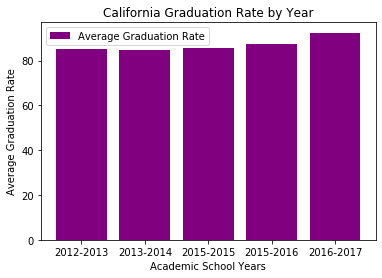

In [160]:
# Create the plot
plt.bar(x_axis, y_axis, color="purple", label='Average Graduation Rate')

# Create labels for the x an y axes
plt.xlabel("Academic School Years")
plt.ylabel("Average Graduation Rate")

# Create a title
plt.title("California Graduation Rate by Year")

plt.savefig("CaGradByYear.png")

# Add the legend
plt.legend()